In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [22]:
#Electric Vehicle Population Data as of today
df = pd.read_csv('../../datasets/Electric_Vehicle_Population_Data.csv')
#https://catalog.data.gov/dataset/electric-vehicle-population-data

In [23]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [24]:
df['Model'].value_counts()

MODEL Y        28502
MODEL 3        27709
LEAF           13187
MODEL S         7611
BOLT EV         5733
               ...  
745LE              2
918                1
FLYING SPUR        1
S-10 PICKUP        1
BENTAYGA           1
Name: Model, Length: 127, dtype: int64

In [25]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            116807
Plug-in Hybrid Electric Vehicle (PHEV)     33675
Name: Electric Vehicle Type, dtype: int64

In [26]:
#Checking mean electric range for BEV's
df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].mean()

78.60890186375816

In [27]:
#Mean electric range for PHEV's
df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].mean()

30.65547141796585

In [28]:
#Above two numbers seems inaccurate
#Checking amount of 0's for electric range from BEV's
len(df[(df['Electric Range'] == 0) & (df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)')])

69698

In [29]:
gg = df[df['Electric Range'] == 0]

gg.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
9,7SAYGDEF0P,King,Bellevue,WA,98004.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,240416207,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
34,5YJ3E1EA4P,King,Bellevue,WA,98006.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,241481278,POINT (-122.16937 47.571015),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
38,1V2DNPE83P,King,Seattle,WA,98125.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,245619664,POINT (-122.296385 47.71558),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
39,1G1FY6S06N,Yakima,Tieton,WA,98947.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,208932349,POINT (-120.75692 46.70383),PACIFICORP,5.307700e+10
54,7SAYGDEE7P,King,Renton,WA,98058.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,11.0,251366160,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [30]:
gg.shape

(69698, 17)

Because the electric range seemed so low, I wanted to see how many of them have 0 as an entry. Will have to figure out what I want to do with this, whether deleting these rows/information or filling it in with data from the same model. 

In [31]:
#Going to order by Electric Range in descending order
df = df.sort_values(by = 'Electric Range', ascending = False)

In [32]:
#Checking to see CAFV Eligibility as so many electric ranges are equal to 0
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligibility unknown as battery range has not been researched    69698
Clean Alternative Fuel Vehicle Eligible                         62951
Not eligible due to low battery range                           17833
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [33]:
#Checking mean for electric vehicles which are eligible
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']['Electric Range'].mean()

156.6460262744039

In [34]:
#Checking mean for electric vehicles which are eligible
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched']['Electric Range'].mean()

0.0

In [35]:
gg = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched']

In [36]:
gg.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
126262,1G1FX6S08P,Pierce,Tacoma,WA,98422.0,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,236513518,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
110491,7SAYGAEE4P,Island,Camano Island,WA,98282.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,10.0,229879233,POINT (-122.5310901 48.2192797),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
130843,7SAXCDE53N,King,Woodinville,WA,98072.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,205567267,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
108838,7SAYGDEE6P,King,Auburn,WA,98001.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,30.0,221374380,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
145010,5YJ3E1EB6N,King,Seattle,WA,98177.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,196328842,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [38]:
#Filling in 0's which can be filled based on model, make and model year
df['Electric Range'] = df.groupby(['Model', 'Make', 'Model Year'])['Electric Range'].transform('max')

In [39]:
df.tail(50)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
72213,5YJ3E1EC0M,Clark,Yacolt,WA,98675.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,18.0,166416645,POINT (-122.4066726 45.8651816),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
72211,KNDCR3L15P,King,Seattle,WA,98117.0,2023,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,33,0,36.0,235190875,POINT (-122.37275 47.68968),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
72206,WMW13DJ06N,King,Seattle,WA,98125.0,2022,MINI,HARDTOP,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,193280272,POINT (-122.296385 47.71558),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
5036,7SAXCAE58P,Clallam,Sequim,WA,98382.0,2023,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,24.0,224415033,POINT (-123.105015 48.08104),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
72155,5YJYGDEE1M,King,Kenmore,WA,98028.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,161394229,POINT (-122.2504747 47.7617128),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
72154,1N4AZ1BV8N,Snohomish,Lake Stevens,WA,98258.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,197564692,POINT (-122.112265 48.0047),PUGET SOUND ENERGY INC,5.306105e+10
72153,YV4ED3UB8N,King,Seattle,WA,98126.0,2022,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,34.0,207291171,POINT (-122.37439 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
72152,5YJ3E1EA2M,King,Seattle,WA,98105.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180587683,POINT (-122.319115 47.66132),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
72110,3FMTK1RM1N,King,Seattle,WA,98116.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,34.0,228008196,POINT (-122.38679 47.56484),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
72109,7SAYGAEE1P,King,Seattle,WA,98133.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,32.0,225890367,POINT (-122.34584 47.76726),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [41]:
df[df['Electric Range'] == 0].shape

(68452, 17)

In [42]:
#Going to remove anything where the electric range is 0
df = df[df['Electric Range'] != 0]
df.shape

(82030, 17)

In [43]:
#Checking mean electric range for BEV's after 0's dropped
df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].mean()

193.99278254575535

In [44]:
#Mean electric range for PHEV's after 0's dropped
df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].mean()

33.851878247958425

In [45]:
#Checking mean for Clean Alternative Fuel Vehicle Eligible
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']['Electric Range'].mean()

158.7880732633318

In [46]:
#Reading in original dataset in case need to use again
df_og = pd.read_csv('../../datasets/Electric_Vehicle_Population_Data.csv')

In [51]:
df_og['Make'].value_counts()

TESLA                   68983
NISSAN                  13497
CHEVROLET               12026
FORD                     7614
BMW                      6439
KIA                      6198
TOYOTA                   5223
VOLKSWAGEN               4074
VOLVO                    3536
JEEP                     3292
HYUNDAI                  3171
AUDI                     3006
CHRYSLER                 2642
RIVIAN                   2483
MERCEDES-BENZ            1054
PORSCHE                  1028
MITSUBISHI                849
HONDA                     810
FIAT                      806
MINI                      791
POLESTAR                  764
SUBARU                    623
SMART                     274
LINCOLN                   229
JAGUAR                    228
LUCID                     190
CADILLAC                  176
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 47
FISKER                     17
ALFA ROMEO                 12
AZURE DYNA

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'TESLA'),
  Text(1, 0, 'NISSAN'),
  Text(2, 0, 'CHEVROLET'),
  Text(3, 0, 'FORD'),
  Text(4, 0, 'BMW'),
  Text(5, 0, 'KIA'),
  Text(6, 0, 'TOYOTA'),
  Text(7, 0, 'VOLKSWAGEN'),
  Text(8, 0, 'VOLVO'),
  Text(9, 0, 'JEEP'),
  Text(10, 0, 'HYUNDAI'),
  Text(11, 0, 'AUDI'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'RIVIAN'),
  Text(14, 0, 'MERCEDES-BENZ'),
  Text(15, 0, 'PORSCHE'),
  Text(16, 0, 'MITSUBISHI'),
  Text(17, 0, 'HONDA'),
  Text(18, 0, 'FIAT'),
  Text(19, 0, 'MINI'),
  Text(20, 0, 'POLESTAR'),
  Text(21, 0, 'SUBARU'),
  Text(22, 0, 'SMART'),
  Text(23, 0, 'LINCOLN'),
  Text(24, 0, 'JAGUAR'),
  Text(25, 0, 'LUCID'),
  Text(26, 0, 'CADILLAC'),
  Text(27, 0, 'LEXUS'),
  Text(28, 0, 'MAZDA'),
  Text(29, 0, 'GENESIS'),
  Text(30, 0, 'LAND ROVER'),
  Text(31, 0,

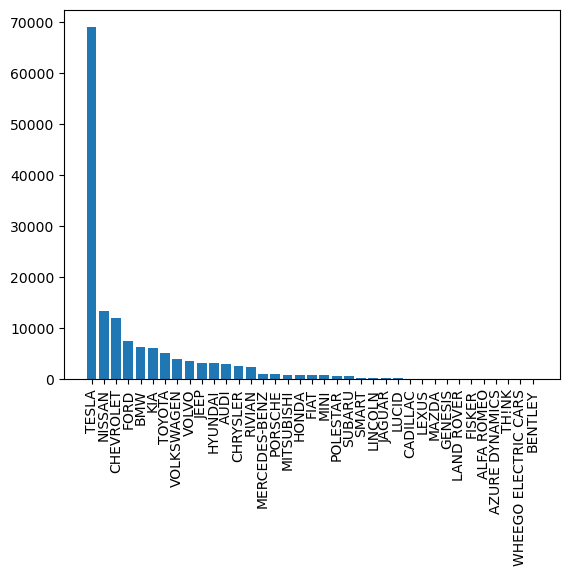

In [50]:
#Create a bar chart based on Make of car
makes = df_og['Make'].value_counts()
plt.bar(makes.index, makes.values)
plt.xticks(rotation = 90)